In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from Jscripts.project_functions.function import load_and_process
df = load_and_process(r"C:\Users\fares\Documents\GitHub\course-project-group_1015\analysis\Johnny\Medical_Cost.csv")
df.head(10)
       # RQ: Medical charges of Tobacco Users in relation to Gender  
    # RQ: Correlation between Age and Medical Cost to Tobacco Users
#sns.jointplot(x=Age['age'],y=Medical Cost per region['Medical Cost per region'])


,Age,Gender,Children,BMI,Tobacco User,Medical Costs per region,Region
1248,18,female,0,40.0,no,$1633.96,southeast
482,18,female,0,31.0,no,$1622.19,southeast
492,18,female,0,25.0,no,$2196.47,northeast
525,18,female,0,34.0,no,$11482.63,southeast
529,18,male,0,25.0,no,$1708.00,northeast
564,18,female,2,32.0,no,$2801.26,southeast
571,18,female,1,37.0,no,$2219.45,southeast
612,18,female,0,33.0,no,$2207.70,northeast
623,18,male,0,34.0,yes,$34617.84,northeast
1283,18,male,1,30.0,no,$1720.35,southeast


In [3]:
df1 = df.copy()
df1['Medical Costs per region'] = df1['Medical Costs per region'].str.replace('$','')
df1['Medical Costs per region'] = df1['Medical Costs per region'].astype(float)

In [4]:
df.info() # return the info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1248 to 635
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1338 non-null   int64  
 1   Gender                    1338 non-null   object 
 2   Children                  1338 non-null   int64  
 3   BMI                       1338 non-null   float64
 4   Tobacco User              1338 non-null   object 
 5   Medical Costs per region  1338 non-null   object 
 6   Region                    1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 83.6+ KB


md

In [5]:
df.describe() #

,Age,Children,BMI
count,1338.000000,1338.000000,1338.000000
mean,39.207025,1.094918,30.663677
std,14.049960,1.205493,6.096007
min,18.000000,0.000000,16.000000
25%,27.000000,0.000000,26.000000
50%,39.000000,1.000000,30.000000
75%,51.000000,2.000000,35.000000
max,64.000000,5.000000,53.000000


In [6]:
df.isnull().sum() #check for missing values "NA/0"

Age                         0
Gender                      0
Children                    0
BMI                         0
Tobacco User                0
Medical Costs per region    0
Region                      0
dtype: int64

In [7]:
# df = df.drop(['Region'],axis=1) #drop region from data as it is not useful for my analysis

In [8]:
df.columns #show columns in data 

Index(['Age', 'Gender', 'Children', 'BMI', 'Tobacco User',
       'Medical Costs per region', 'Region'],
      dtype='object')

In [9]:
df.corr() # calculate correlation between varibles

,Age,Children,BMI
Age,1.000000,0.042469,0.109527
Children,0.042469,1.000000,0.013915
BMI,0.109527,0.013915,1.000000


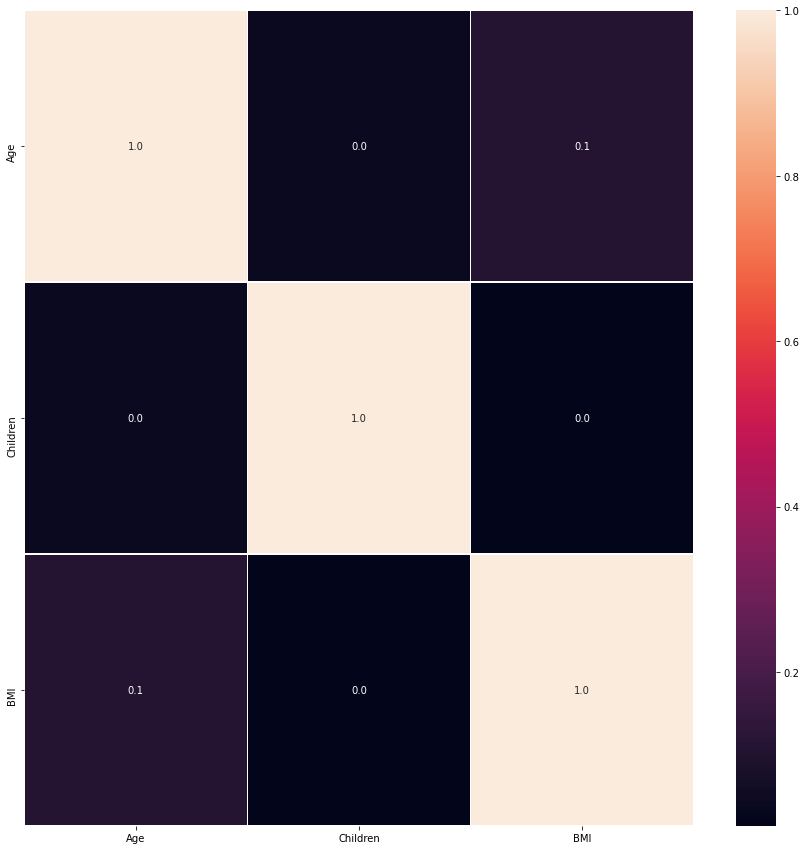

In [13]:
#heatmap to visualize the correlation between functions within the raw data. Numbers close to 1.0 will have a brighter colour.
f,ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

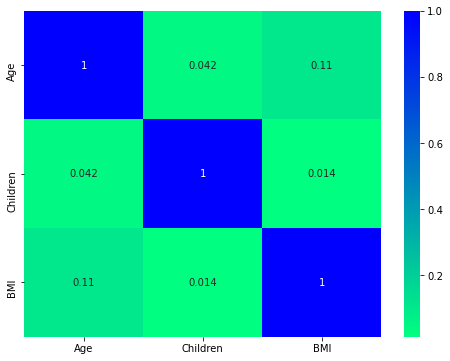

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="winter_r")
plt.show()

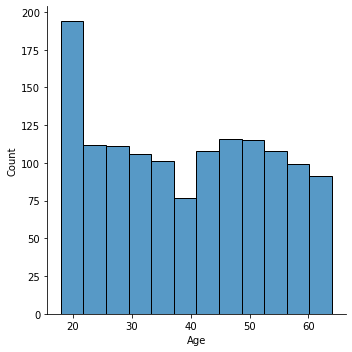

In [12]:
sns.displot(df['Age'])

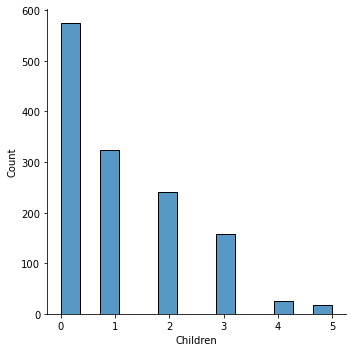

In [11]:
sns.displot(df['Children'])

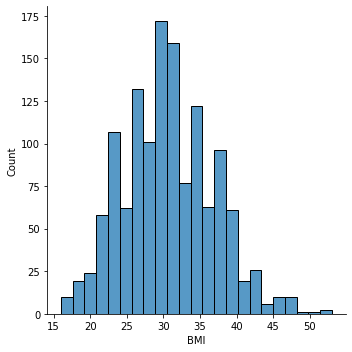

In [10]:
sns.displot(df['BMI'])

<AxesSubplot:xlabel='Age', ylabel='BMI'>

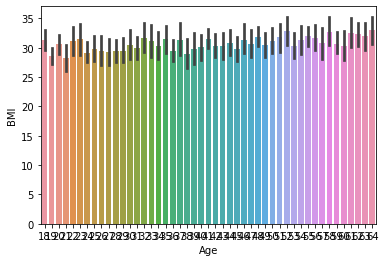

In [13]:
sns.barplot(x = 'Age', y = 'BMI', data = df)

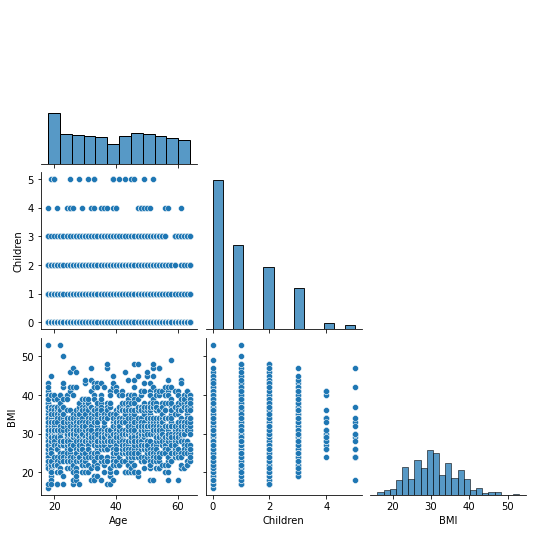

In [19]:
sns.pairplot(data=df.iloc[:,:],corner=True)

In [20]:
#
df.bmi.plot(kind='line', color='g', label='BMI', linewidth=1, alpha=0.5, grid=True, linestyle='-')
df.gender.plot(kind='line', color='r', label='children', linewidth=1, alpha=0.5, grid=True, linestyle=':')
plt.legend('upper left')
plt.xlabel('Age')
plt.ylabel('children')
plt.title('Line Plot')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'bmi'

In [21]:
df.head(10)

,Age,Gender,Children,BMI,Tobacco User,Medical Costs per region,Region
1248,18,female,0,40.0,no,$1633.96,southeast
482,18,female,0,31.0,no,$1622.19,southeast
492,18,female,0,25.0,no,$2196.47,northeast
525,18,female,0,34.0,no,$11482.63,southeast
529,18,male,0,25.0,no,$1708.00,northeast
564,18,female,2,32.0,no,$2801.26,southeast
571,18,female,1,37.0,no,$2219.45,southeast
612,18,female,0,33.0,no,$2207.70,northeast
623,18,male,0,34.0,yes,$34617.84,northeast
1283,18,male,1,30.0,no,$1720.35,southeast


In [22]:
df1=df['smoker']=='smoker'
df_smoker=df[df1]
df2=df['children']=='children'
df_children=df[df2]

KeyError: 'smoker'

In [23]:
df_smoker.charges.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

NameError: name 'df_smoker' is not defined

In [24]:
df.columns


Index(['Age', 'Gender', 'Children', 'BMI', 'Tobacco User',
       'Medical Costs per region', 'Region'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

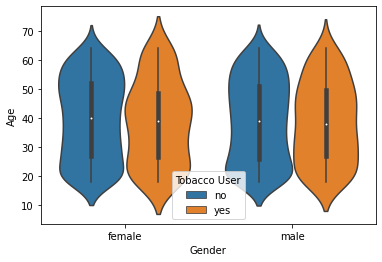

In [25]:
sns.violinplot(data=df,
             y='Age',
             x='Gender',
             hue='Tobacco User')

<AxesSubplot:xlabel='Medical Costs per region', ylabel='Age'>

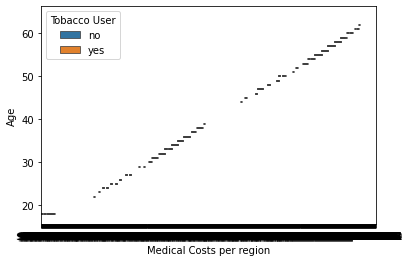

In [26]:
sns.boxplot(data=df,
              y="Age",
              x="Medical Costs per region",
              hue="Tobacco User")

<AxesSubplot:title={'center':'Age'}, xlabel='BMI'>

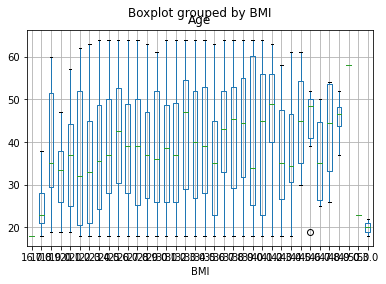

In [15]:
df.boxplot(column='Age',by = 'BMI')

<AxesSubplot:xlabel='BMI', ylabel='Age'>

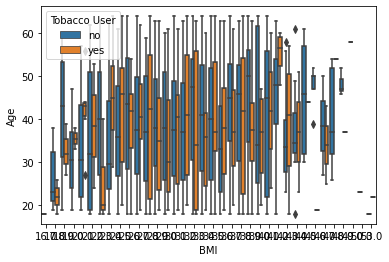

In [16]:
sns.boxplot(data=df,
              y="Age",
              x="BMI",
              hue="Tobacco User")

<AxesSubplot:xlabel='Medical Costs per region', ylabel='Age'>

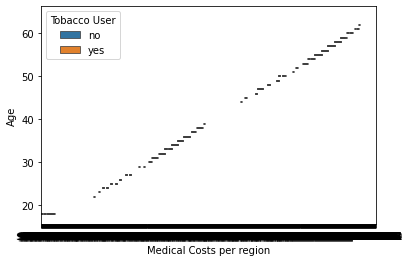

In [28]:
sns.boxplot(data=df,
              y="Age",
              x="Medical Costs per region",
              hue="Tobacco User")

In [29]:
df4=(df['Gender']=='female') & (df['smoker']=='yes') & (df['children']>0)
df[df4]

KeyError: 'smoker'

In [ ]:
df.boxplot(column='age',by = 'children')

In [ ]:
sns.countplot(data=df,y= 'BMI',
             palette = 'colorblind',
             order = df['BMI'].value_counts().index[:5],
             hue = 'Medical Cost per region').set_title("l")

In [122]:
df.MedicalCostsperregion.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'MedicalCostsperregion'

In [123]:
df3=(df['Gender']=='female') & (df['Tobacco User']=='yes') & (df['Children']>0)
df[df3]

,Age,Gender,Children,BMI,Tobacco User,Medical Costs per region,Region
1204,18,female,3,27.0,yes,$18223.45,southeast
1313,19,female,2,35.0,yes,$36397.58,southwest
261,20,female,1,27.0,yes,$17085.27,southeast
593,21,female,1,22.0,yes,$15359.10,northeast
1021,22,female,3,31.0,yes,$35595.59,southeast
...,...,...,...,...,...,...,...
330,61,female,1,36.0,yes,$48517.56,northeast
103,61,female,3,30.0,yes,$30942.19,southeast
251,63,female,2,32.0,yes,$47305.31,southwest
94,64,female,2,31.0,yes,$47291.06,southwest


In [114]:
df3=(df['Gender']=='male') & (df['Tobacco User']=='yes') & (df['Children']>0)
df[df3]

,Age,Gender,Children,BMI,Tobacco User,Medical Costs per region,Region
57,18,male,2,32.0,yes,$34303.17,southeast
250,18,male,2,17.0,yes,$12829.46,northeast
1170,18,male,1,27.0,yes,$17178.68,northeast
1026,19,male,1,26.0,yes,$16450.89,northwest
105,20,male,1,28.0,yes,$17560.38,northwest
...,...,...,...,...,...,...,...
677,60,male,3,31.0,yes,$46130.53,northwest
1284,61,male,1,36.0,yes,$47403.88,southwest
475,61,male,1,28.0,yes,$28868.66,northwest
1301,62,male,3,31.0,yes,$46718.16,northwest


In [62]:
# More Male smokers than female 


In [132]:
df1=df['Gender']=='female'
df_female=df[df1]
df2=df['Gender']=='male'
df_male=df[df2]
#df3=df['Medical Costs per region']=='charges'
#df_charges=df[df3]

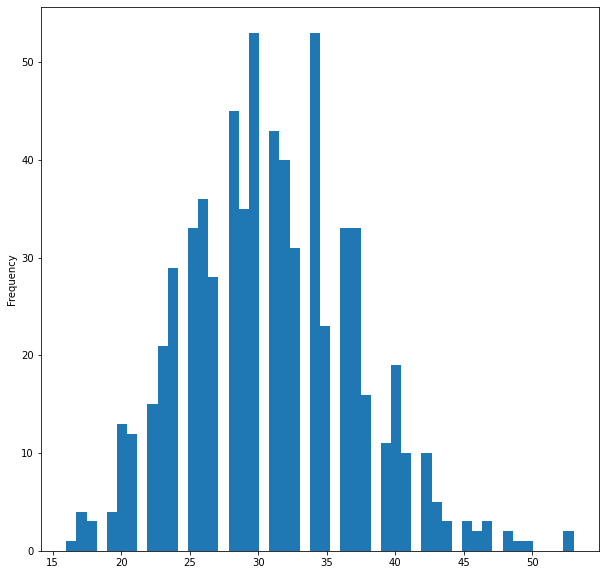

In [135]:
df_male.BMI.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()

In [117]:
df.columns

Index(['Age', 'Gender', 'Children', 'BMI', 'Tobacco User',
       'Medical Costs per region', 'Region'],
      dtype='object')

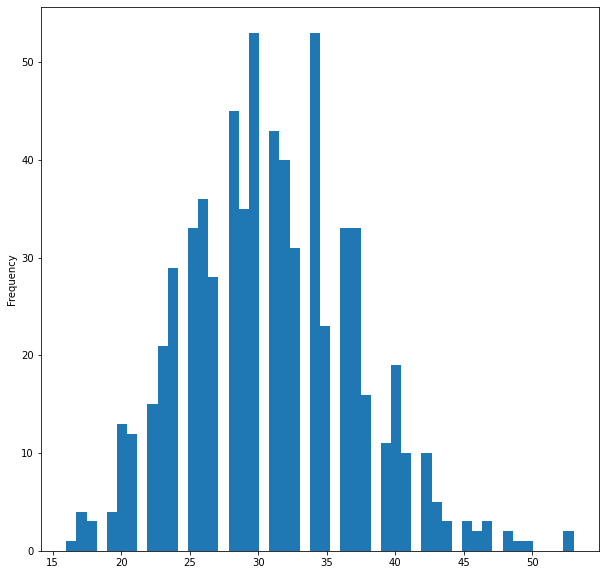

In [82]:
df_male.BMI.plot(kind='hist', bins=50, figsize=(10,10))
plt.show()